In [61]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

In [77]:
ori_data=pd.read_csv("Titanic_train.csv")
ori_data.info()
display(ori_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
missing_vals=ori_data.isnull().sum()/len(ori_data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


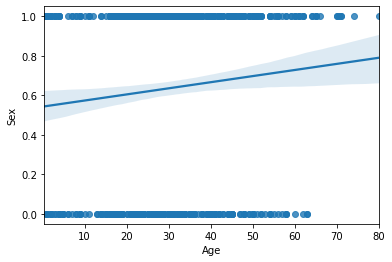

In [73]:
# step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
# 離散資料轉換
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
ori_data["Sex"]=le.fit_transform(ori_data['Sex'])
# age 與 sex 關聯性
g=sns.regplot(x="Age",y="Sex",data=ori_data)

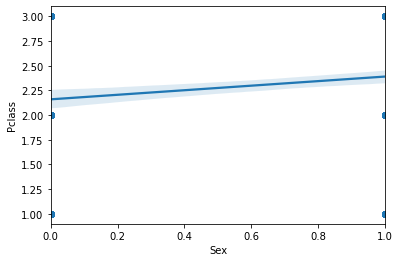

In [74]:
# Pclass 與 Sex 關聯性
g=sns.regplot(x="Sex",y="Pclass",data=ori_data)

In [90]:
# step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。
data=ori_data[["Sex","Pclass","Age"]]
display(data)
from sklearn.impute import KNNImputer

data["Sex"]=data["Sex"].replace({"female":1000,"male":0})
imputer=KNNImputer(n_neighbors=3,weights="distance")
df_filled=pd.DataFrame(imputer.fit_transform(data))
display(df_filled)

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
...,...,...,...
886,male,2,27.0
887,female,1,19.0
888,female,3,NaN
889,male,1,26.0


<ipython-input-90-842002c45059>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"]=data["Sex"].replace({"female":1000,"male":0})


,0,1,2
0,0.0,3.0,22.0
1,1000.0,1.0,38.0
2,1000.0,3.0,26.0
3,1000.0,1.0,35.0
4,0.0,3.0,35.0
...,...,...,...
886,0.0,2.0,27.0
887,1000.0,1.0,19.0
888,1000.0,3.0,19.0
889,0.0,1.0,26.0
